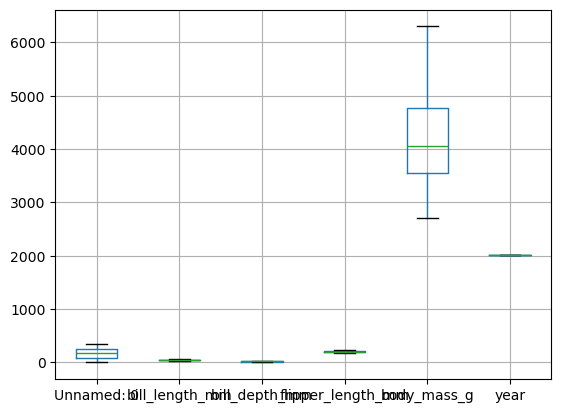

     Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
1             2     Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2             3     Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
4             5     Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5             6     Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
7             8     Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
..          ...        ...        ...             ...            ...                ...          ...     ...   ...
339         340  Chinstrap      Dream            55.8           19.8              207.0       4000.0    male  2009
340         341  Chinstrap      Dream            43.5           18.1            

C:\Users\asm95\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asm95\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asm95\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asm95\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

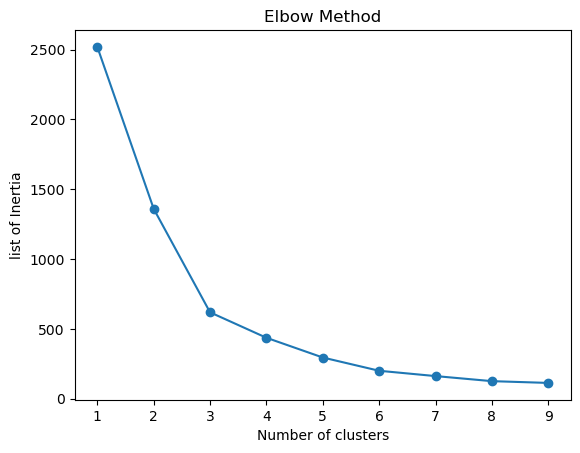

C:\Users\asm95\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


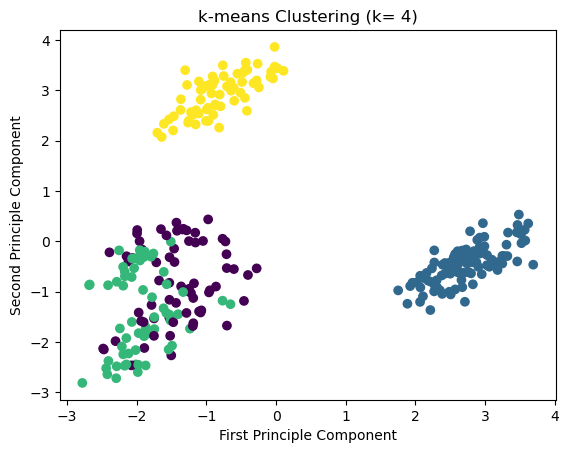

       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g         year  label
label                                                                                               
0       83.926471       40.517647      19.127941         193.338235  4061.397059  2008.132353    0.0
1      210.480000       46.802000      14.759000         215.140000  4998.000000  2008.000000    1.0
2       81.936508       37.111111      17.626984         189.317460  3385.317460  2008.126984    2.0
3      311.384615       48.833846      18.450769         196.553846  3743.076923  2008.015385    3.0


In [20]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Loading and examining the dataset
penguins_df= pd.read_csv("penguins.csv")
penguins_df.head()
penguins_df.shape

# Checking for null values
penguins_df.isna().sum()

# Removing null values
penguins_df.dropna(inplace=True)
penguins_df.shape

# Checking for outliers
penguins_df.boxplot()
plt.show()

# Removing outliers thorugh boolean indexing
lower_threshold = penguins_df["flipper_length_mm"].quantile(0.05)
upper_threshold = penguins_df["flipper_length_mm"].quantile(0.95)
penguins_clean = penguins_df[
                (penguins_df["flipper_length_mm"] > lower_threshold) & 
                (penguins_df["flipper_length_mm"] < upper_threshold)].copy()
print(penguins_clean)

# Pre processing the cleaned data(categorical coolumns) using one-hot encoding
cat_cols = penguins_clean.select_dtypes(include=['object']).columns
penguins_clean = pd.get_dummies(penguins_clean, columns=cat_cols, drop_first=True)

# Applying standard scaling method
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
penguins_scaled= scaler.fit_transform(penguins_clean)

# Applying PCA on the scaled dataset
model = PCA()
model.fit(penguins_scaled)
print(model.components_)
print(model.explained_variance_ratio_)
n_components = max(1,sum(model.explained_variance_ratio_ > 0.10))
model= PCA(n_components)
penguins_PCA = model.fit_transform(penguins_scaled)

# Finding  optimal number of Clusters for the K-means clustering algortihm using Elbow method
inertia_vals = []
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(penguins_PCA)
    inertia_vals.append(km.inertia_)
    
plt.plot(range(1, 10), inertia_vals, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('list of Inertia')
plt.title('Elbow Method')
plt.show()

# Applying K-means algorithm with the optimal number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters= n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(penguins_PCA)

# Visualizing the clusters using the first 2 principle components
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=labels)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.title(f"k-means Clustering (k= {n_clusters})")
plt.show()

# Finally,creating statistical dataframe for each cluster
penguins_clean['label'] = labels
numeric_columns = penguins_clean.select_dtypes(include=["number"])
stat_penguins = penguins_clean.groupby('label')[numeric_columns.columns].mean()
print(stat_penguins)

